# 0.3 Data Gather merge post-processing

Our main objective at this point is to read metadata from xml files from NTCIR12 and YOLO .csv files and merge it into a pandas DataFrame.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import seaborn as sns
sns.set()

import plotly
plotly.offline.init_notebook_mode(connected=True)

In [60]:
u_tags=['person', 'chair', 'book', 'tvmonitor', 'laptop', 'bottle', 'cup', 'car', 'diningtable', 'cell phone', 'keyboard', 'bowl', 'mouse', 'clock', 'toilet', 'suitcase', 'sink', 'remote', 'pottedplant', 'refrigerator', 'knife', 'handbag', 'vase', 'aeroplane', 'cat', 'bed', 'sofa', 'backpack', 'tie', 'spoon', 'toothbrush', 'traffic light', 'bicycle', 'train', 'bench', 'microwave', 'bird', 'fork', 'oven', 'motorbike', 'wine glass', 'donut', 'apple', 'pizza', 'scissors', 'umbrella', 'cake', 'bus', 'truck', 'banana', 'parking meter', 'sandwich', 'sports ball', 'broccoli', 'carrot', 'orange', 'teddy bear', 'dog', 'snowboard', 'skateboard', 'boat', 'surfboard', 'frisbee', 'skis', 'hot dog', 'bear', 'elephant', 'toaster', 'stop sign', 'hair drier', 'kite', 'sheep', 'zebra', 'tennis racket', 'baseball bat', 'fire hydrant', 'horse', 'giraffe', 'cow', 'baseball glove']

In [61]:
csv_file1 = './../data/u1_data.csv'

df1= pd.read_csv(csv_file1,sep=';')
df1.head()

,user,date,filename,toilet,teddy bear,sports ball,bicycle,apple,laptop,scissors,...,skis,giraffe,truck,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove
0,u1,2015-02-26,b00000492_21i6bq_20150226_113924e.jpg,0.0,0.0,0.0,0.0,0.0,0.21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,u1,2015-03-06,b00001046_21i6bq_20150306_160742e.jpg,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,u1,2015-03-20,b00003752_21i6bq_20150320_084445e.jpg,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,u1,2015-03-15,b00000740_21i6bq_20150315_145040e.jpg,0.0,0.0,0.5,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,u1,2015-03-07,b00000477_21i6bq_20150307_113654e.jpg,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0


In [62]:
csv_file2 = './../data/u2_data.csv' #load the csv file

df2= pd.read_csv(csv_file2,sep=';')
df2.head()

,user,date,filename,toilet,teddy bear,sports ball,bicycle,apple,laptop,scissors,...,skis,giraffe,truck,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove
0,u2,2015-04-26,b00003849_21i7lf_20150426_115238e.jpg,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,u2,2015-04-26,b00003850_21i7lf_20150426_115350e.jpg,0.32,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,u2,2015-04-26,b00003851_21i7lf_20150426_115425e.jpg,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,u2,2015-04-26,b00003852_21i7lf_20150426_115459e.jpg,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
4,u2,2015-04-26,b00003853_21i7lf_20150426_115536e.jpg,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
csv_file3 = './../data/u3_data.csv' #load the csv file

df3= pd.read_csv(csv_file3,sep=';')
df3.head()

,user,date,filename,toilet,teddy bear,sports ball,bicycle,apple,laptop,scissors,...,skis,giraffe,truck,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove
0,u3,2015-07-13,b00002185_21i79q_20150713_122910e.jpg,0.89,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0
1,u3,2015-07-13,b00002186_21i79q_20150713_122951e.jpg,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,u3,2015-07-13,b00002187_21i79q_20150713_123026e.jpg,0.17,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,u3,2015-07-13,b00002188_21i79q_20150713_123059e.jpg,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.0,0.0,0.0
4,u3,2015-07-13,b00002189_21i79q_20150713_123138e.jpg,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0


We can take a look into a df3 (corresponding to u3) data information:

In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26583 entries, 0 to 26582
Data columns (total 83 columns):
user              26583 non-null object
date              26583 non-null object
filename          26583 non-null object
toilet            26583 non-null float64
teddy bear        26583 non-null float64
sports ball       26583 non-null float64
bicycle           26583 non-null float64
apple             26583 non-null float64
laptop            26583 non-null float64
scissors          26583 non-null float64
donut             26583 non-null float64
snowboard         26583 non-null float64
carrot            26583 non-null float64
zebra             26583 non-null float64
oven              26583 non-null float64
keyboard          26583 non-null float64
pottedplant       26583 non-null float64
tvmonitor         26583 non-null float64
chair             26583 non-null float64
parking meter     26583 non-null float64
mouse             26583 non-null float64
frisbee           26583 non-null 

## Concatenate all users into an unique DataFrame

In [65]:
columns= df3.columns # get the column list from any df: we select df3
df_all=pd.concat([df1,df2,df3]) #concatenate all data
df_all=df_all.reindex_axis(columns, axis=1) #re-order columns

Checking number of rows related to each user (one per image):

In [66]:
df_all.user.value_counts()

u1    37140
u3    26583
u2    24401
Name: user, dtype: int64

And a summary of all infomartion dthat contains this new DataFrame:

In [67]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88124 entries, 0 to 26582
Data columns (total 83 columns):
user              88124 non-null object
date              88124 non-null object
filename          88124 non-null object
toilet            88124 non-null float64
teddy bear        88124 non-null float64
sports ball       88124 non-null float64
bicycle           88124 non-null float64
apple             88124 non-null float64
laptop            88124 non-null float64
scissors          88124 non-null float64
donut             88124 non-null float64
snowboard         88124 non-null float64
carrot            88124 non-null float64
zebra             88124 non-null float64
oven              88124 non-null float64
keyboard          88124 non-null float64
pottedplant       88124 non-null float64
tvmonitor         88124 non-null float64
chair             88124 non-null float64
parking meter     88124 non-null float64
mouse             88124 non-null float64
frisbee           88124 non-null 

# Loadind metadata from XML files

We load .csv file with images and users metadata. This file has been obteined from the original data set .xml file. The variable **columns** contain de name of the columns with usefull information for us.

In [68]:
columns = ['user','age','day_id','date','image_directory','activity','image_id','image_path','location','gender','height','weight']

In [69]:
#load the file with a semicolon tab and the specific columns from the list created above
csv_file = './../data/NTCIR-Lifelog_formal_run_dataset.csv'
df_xml= pd.read_csv(csv_file,sep=';', usecols=columns)

df_xml.head()

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,height,weight
0,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78
1,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78
2,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78
3,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78
4,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78


One of tha aims of this study is correlationate activities with objects in the images. Then we are goint to take a look to this column abstract:

In [70]:
df_xml.activity.unique()

array([nan, 'walking', 'transport', 'running', 'cycling', 'car', 'bus'], dtype=object)

As we can see in our data, 6 activities are found and many nan (without information). 

In [71]:
len(df_xml.activity)

149512

In [72]:
len(df_xml[df_xml.activity.isnull()])

133707

We have very few imatges with activity related information. then we have to add extra activity tags. From the list of activities we know that every index corresponds with information that we can find related to the activity (number from 0 to 20).

In [73]:
activities = ["Public transport","Driving","Walking outdoors","Walking indoors",
                "Biking","Having drinks with somebody","Having drinks\meal alone",
                "Having meal with somebody","Socializing","Attending a seminar",
                "Meeting","Reading","TV","Cleaning and chores","Working","Cooking",
                "Shopping","Talking","Resting","Mobile","Plane"]

In [74]:
activities[0] #that way we translate the number to the activity

'Public transport'

Here we open the file and get al information into variable lines:

In [75]:
f = open("./../data/all_annotated_images.txt")
lines = f.readlines()

Here, using regular expresions we split every line of information from file we obtaing a list of two elements corresponding to file_path and activity translated to word/words. Some file names follow a different patern anb we use find and '.jpg' string to split it:

In [76]:
import re

def info_formated(string_info):
    if "(1)" not in string_info: 
        file_path,activity_number = re.split("[ ]+", string_info.rstrip())
        return '/'+file_path,activities[int(activity_number)]
 
    else: #casos especiales con nombre con (1) en el nombre de fichero
        return '/'+string_info[:string_info.find(".jpg")+4],activities[int(string_info[string_info.find(".jpg")+5:])]

with open("./../data/all_annotated_images.txt") as f:
    all_annotated_images = [info_formated(line) for line in f.readlines()]

Some examples to check that information obtained with the file and corresponding photo is correct.Every time the cell is executed one picture with the activity as a title is ploted.

('/u2/2015-06-17/b00002405_21i7lf_20150617_134512e.jpg', 'Public transport')


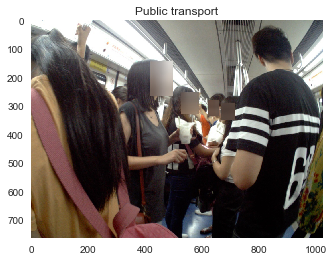

In [77]:
%matplotlib inline
import random
root_file = './../images/'
sample = random.choice(all_annotated_images)
print sample
image_file, activity = sample
image_path = root_file + image_file
img = plt.imread(image_path)
plt.title(activity)
plt.grid('off')
plt.imshow(img)

In [78]:
len(df_xml[df_xml.activity.isnull()])

133707

Another problem of our data set is that some of the samples haven't got **image_path** variable related to them. For this reason we filter this samples because we won't to be able to use them in our analisys.

In [79]:
not_empty= df_xml['image_path'].notnull() # create a filter (TRUE/FALSE)  not empty values in 'image path' column
df_xml1=df_xml[not_empty].reset_index() # create new df and reset index
df_xml1.head()

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,height,weight
0,424,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070647_1,/u1/2015-02-23/b00000000_21i6bq_20150223_07064...,Home,male,173,78
1,426,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070808_1,/u1/2015-02-23/b00000001_21i6bq_20150223_07080...,Home,male,173,78
2,427,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070809_2,/u1/2015-02-23/b00000002_21i6bq_20150223_07080...,Home,male,173,78
3,428,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070810_3,/u1/2015-02-23/b00000003_21i6bq_20150223_07081...,Home,male,173,78
4,429,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070810_4,/u1/2015-02-23/b00000004_21i6bq_20150223_07081...,Home,male,173,78


In [80]:
df_xml1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 13 columns):
index              88124 non-null int64
user               88124 non-null object
age                88124 non-null int64
day_id             88124 non-null int64
date               88124 non-null object
image_directory    88124 non-null object
activity           13883 non-null object
image_id           88124 non-null object
image_path         88124 non-null object
location           49496 non-null object
gender             88124 non-null object
height             88124 non-null int64
weight             88124 non-null int64
dtypes: int64(5), object(8)
memory usage: 8.7+ MB


In [81]:
len(df_xml1.activity)

88124

In [82]:
len(df_xml1[df_xml1.activity.isnull()])

74241

## Merging metadata information with detected objects with YOLO

Before adding all the information from .txt file we check with 1 value that the procedure is correct.

In [87]:
file_path_value = all_annotated_images[2][0]
activity_value = all_annotated_images[2][1]

df_xml1[df_xml1.image_path == file_path_value]

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,height,weight
63904,102810,u3,48,54,18/06/2015,NTCIR-Lifelog_images/u3/2015-06-18/,NaN,u3_2015-06-18_180747_2,/u3/2015-06-18/b00000472_21i79q_20150618_18074...,NaN,male,176,85


In [90]:
df_xml1.loc[df_xml1.image_path == all_annotated_images[2][0], 'activity'] = activity_value

last step verification, we check with 1 value that the procedure is correct...

In [91]:
print activity_value
df_xml1[df_xml1.image_path == file_path_value]

Resting


,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,height,weight
63904,102810,u3,48,54,18/06/2015,NTCIR-Lifelog_images/u3/2015-06-18/,Resting,u3_2015-06-18_180747_2,/u3/2015-06-18/b00000472_21i79q_20150618_18074...,NaN,male,176,85


The activity has been added properly

Now, we can do the same with all images paths and activities we have (might take 30 min to compute):

In [92]:
total =len(all_annotated_images)
count = 1

for sample in all_annotated_images:
    
    file_path_value = sample[0]
    activity_value = sample[1]
    df_xml1.loc[df_xml1.image_path == file_path_value, 'activity'] = activity_value
    if count%500 == 0:
        print str(count) +' out of '+ str(total)
        count+=1
    else:
        count+=1

500 out of 45000
1000 out of 45000
1500 out of 45000
2000 out of 45000
2500 out of 45000
3000 out of 45000
3500 out of 45000
4000 out of 45000
4500 out of 45000
5000 out of 45000
5500 out of 45000
6000 out of 45000
6500 out of 45000
7000 out of 45000
7500 out of 45000
8000 out of 45000
8500 out of 45000
9000 out of 45000
9500 out of 45000
10000 out of 45000
10500 out of 45000
11000 out of 45000
11500 out of 45000
12000 out of 45000
12500 out of 45000
13000 out of 45000
13500 out of 45000
14000 out of 45000
14500 out of 45000
15000 out of 45000
15500 out of 45000
16000 out of 45000
16500 out of 45000
17000 out of 45000
17500 out of 45000
18000 out of 45000
18500 out of 45000
19000 out of 45000
19500 out of 45000
20000 out of 45000
20500 out of 45000
21000 out of 45000
21500 out of 45000
22000 out of 45000
22500 out of 45000
23000 out of 45000
23500 out of 45000
24000 out of 45000
24500 out of 45000
25000 out of 45000
25500 out of 45000
26000 out of 45000
26500 out of 45000
27000 out of 

In [93]:
def getname(data):
    return data.split('/')[3] 

df_xml1['filename']=df_xml1['image_path'].apply(getname) # add new column with the name of the jpg file

In [94]:
df_xml1.head()
df_xml1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 14 columns):
index              88124 non-null int64
user               88124 non-null object
age                88124 non-null int64
day_id             88124 non-null int64
date               88124 non-null object
image_directory    88124 non-null object
activity           49903 non-null object
image_id           88124 non-null object
image_path         88124 non-null object
location           49496 non-null object
gender             88124 non-null object
height             88124 non-null int64
weight             88124 non-null int64
filename           88124 non-null object
dtypes: int64(5), object(9)
memory usage: 9.4+ MB


In [95]:
df_xml1.activity.value_counts()

Working                        6971
Resting                        5365
Mobile                         5045
Walking outdoors               3476
Driving                        3001
Talking                        2651
walking                        2533
transport                      2102
Socializing                    1825
Meeting                        1776
Walking indoors                1741
Having drinks\meal alone       1652
Public transport               1574
Having drinks with somebody    1418
TV                             1389
Shopping                       1175
Reading                        1174
Having meal with somebody      1065
Plane                          1030
Attending a seminar            1023
Cleaning and chores             827
Cooking                         575
Biking                          247
bus                             219
running                          38
car                               7
cycling                           4
Name: activity, dtype: int64

There are activities that seems the same such as walking, Walking indoors, Walking outdoors

Before we do anything further with the data let's merge this dataFrame with the previous dataframe from the image analysis from different users

### Finally, we can merde all samples dataframes.

In [96]:
df=pd.merge(df_xml1,df_all, on='filename')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88124 entries, 0 to 88123
Data columns (total 96 columns):
index              88124 non-null int64
user_x             88124 non-null object
age                88124 non-null int64
day_id             88124 non-null int64
date_x             88124 non-null object
image_directory    88124 non-null object
activity           49903 non-null object
image_id           88124 non-null object
image_path         88124 non-null object
location           49496 non-null object
gender             88124 non-null object
height             88124 non-null int64
weight             88124 non-null int64
filename           88124 non-null object
user_y             88124 non-null object
date_y             88124 non-null object
toilet             88124 non-null float64
teddy bear         88124 non-null float64
sports ball        88124 non-null float64
bicycle            88124 non-null float64
apple              88124 non-null float64
laptop             88124 non-n

In [98]:
df.head(4)

,index,user_x,age,day_id,date_x,image_directory,activity,image_id,image_path,location,...,skis,giraffe,truck,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove
0,424,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070647_1,/u1/2015-02-23/b00000000_21i6bq_20150223_07064...,Home,...,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0
1,426,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070808_1,/u1/2015-02-23/b00000001_21i6bq_20150223_07080...,Home,...,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.0,0.0,0.0
2,427,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070809_2,/u1/2015-02-23/b00000002_21i6bq_20150223_07080...,Home,...,0.0,0.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,0.0
3,428,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070810_3,/u1/2015-02-23/b00000003_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.36,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df = df.rename(columns={'user_x': 'user', 'date_x': 'date'})

In [100]:
df.columns

Index([u'index', u'user', u'age', u'day_id', u'date', u'image_directory',
       u'activity', u'image_id', u'image_path', u'location', u'gender',
       u'height', u'weight', u'filename', u'user_y', u'date_y', u'toilet',
       u'teddy bear', u'sports ball', u'bicycle', u'apple', u'laptop',
       u'scissors', u'donut', u'snowboard', u'carrot', u'zebra', u'oven',
       u'keyboard', u'pottedplant', u'tvmonitor', u'chair', u'parking meter',
       u'mouse', u'frisbee', u'boat', u'kite', u'hair drier', u'horse',
       u'motorbike', u'banana', u'cup', u'backpack', u'toaster', u'bowl',
       u'microwave', u'bench', u'fire hydrant', u'book', u'diningtable',
       u'elephant', u'orange', u'tie', u'bird', u'knife', u'pizza', u'fork',
       u'sheep', u'sandwich', u'umbrella', u'aeroplane', u'tennis racket',
       u'sofa', u'bus', u'bear', u'vase', u'toothbrush', u'spoon', u'train',
       u'sink', u'stop sign', u'handbag', u'cell phone', u'broccoli',
       u'refrigerator', u'remote', u's

In [101]:
new_columns=['user', 'age', 'day_id','date', 'activity','image_path','filename','location',
             'gender', 'height', 'weight','person','chair', 'book', 'tvmonitor', 'laptop', 'bottle','cup', 'car','diningtable', 'cell phone',
             'keyboard', 'bowl', 'mouse', 'clock','toilet', 'sink', 'remote', 'suitcase', 'pottedplant','refrigerator',
             'knife', 'handbag', 'vase', 'aeroplane', 'cat','bed', 'sofa', 'backpack', 'tie', 'spoon', 'toothbrush',
             'traffic light', 'bicycle', 'train', 'bird', 'microwave', 'bench','fork', 'oven', 'motorbike', 'donut',
             'wine glass', 'pizza','apple', 'scissors', 'umbrella', 'cake', 'bus', 'truck','banana', 'parking meter',
             'sandwich', 'sports ball', 'broccoli','carrot', 'orange', 'teddy bear', 'dog', 'snowboard','skateboard', 'boat',
             'surfboard', 'frisbee', 'skis', 'hot dog','bear', 'elephant', 'toaster', 'stop sign', 'hair drier', 'kite',
             'sheep', 'zebra', 'tennis racket', 'baseball bat', 'fire hydrant','horse', 'cow', 'giraffe', 'baseball glove']

In [102]:
df.shape

(88124, 96)

remove rows where there is any NaN in the activity column

In [103]:
df=df[df.activity.notnull()]

In [104]:
df.head(1)

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,...,skis,giraffe,truck,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove
6,431,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,Mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
df.shape

(49903, 96)

In [106]:
# coming back on the activity...
df.activity.value_counts()

Working                        6971
Resting                        5365
Mobile                         5045
Walking outdoors               3476
Driving                        3001
Talking                        2651
walking                        2533
transport                      2102
Socializing                    1825
Meeting                        1776
Walking indoors                1741
Having drinks\meal alone       1652
Public transport               1574
Having drinks with somebody    1418
TV                             1389
Shopping                       1175
Reading                        1174
Having meal with somebody      1065
Plane                          1030
Attending a seminar            1023
Cleaning and chores             827
Cooking                         575
Biking                          247
bus                             219
running                          38
car                               7
cycling                           4
Name: activity, dtype: int64

We drop two activities (car and cycling) from DataFrame because we have only few occurrences:

In [107]:
def activity_list(action): # return a list of files with the specific activity
    data = df[df.activity==action]['image_path'].values
    return data

In [108]:
df = df[df.activity != 'car']

Well, we finally converted 'cycling' to 'Biking' that we undertand that characterize the same kind of activity:

In [109]:
#convert cycling as Biking activity
df.activity.replace('cycling','Biking',inplace=True)

We also merged similar activities:

In [110]:
#convert running as walking activity
df.activity.replace('running','walking',inplace=True)

In [111]:
#convert Walking outdoors and Walking indoors as walking activity
df.activity.replace('Walking outdoors','walking',inplace=True)
df.activity.replace('Walking indoors','walking',inplace=True)

In [114]:
#convert bus and Public transport as transport
df.activity.replace('bus','transport',inplace=True)
df.activity.replace('Public transport','transport',inplace=True) 

To finally obtain 20 different activities:

In [116]:
df.activity.value_counts(),len(df.activity.value_counts())

(walking                        7788
 Working                        6971
 Resting                        5365
 Mobile                         5045
 transport                      3895
 Driving                        3001
 Talking                        2651
 Socializing                    1825
 Meeting                        1776
 Having drinks\meal alone       1652
 Having drinks with somebody    1418
 TV                             1389
 Shopping                       1175
 Reading                        1174
 Having meal with somebody      1065
 Plane                          1030
 Attending a seminar            1023
 Cleaning and chores             827
 Cooking                         575
 Biking                          251
 Name: activity, dtype: int64, 20)

In [117]:
#convert all activity tags into lower case
df.activity= df.activity.str.lower()

Checking one random activity:

/u3/2015-08-01/b00006456_21i79q_20150801_201752e.jpg


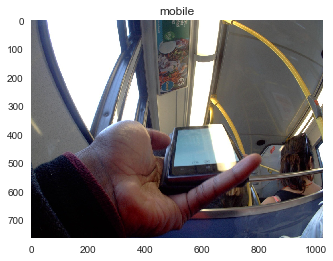

In [122]:
%matplotlib inline
root_file = './../images'
action = 'mobile' #get these images with this activity
sample = random.choice(activity_list(action)) #take one image at random
print sample
image_path = root_file + sample
img = plt.imread(image_path)
plt.title(action)
plt.grid('off')
plt.imshow(img)

In [123]:
df.reset_index()
df.head()

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,...,skis,giraffe,truck,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove
6,431,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
7,432,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0
8,433,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
9,434,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.36,0.0,0.0,0.0,0.0,0.0,0.0
10,435,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,...,0.0,0.0,0.0,0.45,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
df.shape

(49896, 96)

In [125]:
#we add this 2 columns to the dataframe
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
df['day_of_week_name'] = pd.to_datetime(df['date']).dt.weekday_name

In [126]:
df.head()

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,...,truck,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove,day_of_week,day_of_week_name
6,431,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday
7,432,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,...,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday
8,433,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday
9,434,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,...,0.0,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday
10,435,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,...,0.0,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday


In [128]:
df_new=df.copy()

get time and convert date+time into a timestamp index

In [129]:
date=(df_new['image_id'].str[3:13])
df_new['date_new'] = pd.to_datetime(date)

hora= (df_new['image_id'].str[14:16].astype(int))*3600
minutes = (df_new['image_id'].str[16:18].astype(int))*60
seconds = (df_new['image_id'].str[18:20].astype(int))*1
total = hora+minutes+seconds

df_new['horario'] = pd.to_timedelta((total).astype('int'), unit='s') #convert seconds to HH:MM:SS and add to new column

In [130]:
df_new.head()

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,...,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove,day_of_week,day_of_week_name,date_new,horario
6,431,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:12
7,432,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:13
8,433,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:13
9,434,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:14
10,435,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:22


In [136]:
print type(df_new['date_new'])
print type(df_new['horario'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [139]:
df_new.index = df_new.date_new.values + df_new.horario.values
# we assign the date and time as the index series

In [140]:
# remove unwanted columns
df_new=df_new.drop("index",axis = 1)

In [141]:
df_new=df_new.drop('horario',axis =1)
df_new.head()

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,...,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove,day_of_week,day_of_week_name,date_new
2015-02-23 07:08:12,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,male,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,male,...,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,male,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:14,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,male,...,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:22,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,male,...,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23


In [142]:
# remove other columns like user_y, date_y
df_new=df_new.drop(['user_y','date_y'],axis =1)
df_new.columns

Index([u'user', u'age', u'day_id', u'date', u'image_directory', u'activity',
       u'image_id', u'image_path', u'location', u'gender', u'height',
       u'weight', u'filename', u'toilet', u'teddy bear', u'sports ball',
       u'bicycle', u'apple', u'laptop', u'scissors', u'donut', u'snowboard',
       u'carrot', u'zebra', u'oven', u'keyboard', u'pottedplant', u'tvmonitor',
       u'chair', u'parking meter', u'mouse', u'frisbee', u'boat', u'kite',
       u'hair drier', u'horse', u'motorbike', u'banana', u'cup', u'backpack',
       u'toaster', u'bowl', u'microwave', u'bench', u'fire hydrant', u'book',
       u'diningtable', u'elephant', u'orange', u'tie', u'bird', u'knife',
       u'pizza', u'fork', u'sheep', u'sandwich', u'umbrella', u'aeroplane',
       u'tennis racket', u'sofa', u'bus', u'bear', u'vase', u'toothbrush',
       u'spoon', u'train', u'sink', u'stop sign', u'handbag', u'cell phone',
       u'broccoli', u'refrigerator', u'remote', u'surfboard', u'cow',
       u'hot dog', u

In [143]:
df_new.to_csv('./../data/ntcir12.csv')

## Opening new .csv file with all information and analize information that contains

In [145]:
df=pd.read_csv('./../data/ntcir12.csv',sep=',', index_col='Unnamed: 0')

In [146]:
df.head()

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,...,bottle,suitcase,cake,wine glass,baseball bat,traffic light,baseball glove,day_of_week,day_of_week_name,date_new
2015-02-23 07:08:12,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,male,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,male,...,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,male,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:14,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,male,...,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:22,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,male,...,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23


In [147]:
df.index

Index([u'2015-02-23 07:08:12', u'2015-02-23 07:08:13', u'2015-02-23 07:08:13',
       u'2015-02-23 07:08:14', u'2015-02-23 07:08:22', u'2015-02-23 07:08:59',
       u'2015-02-23 07:09:31', u'2015-02-23 07:10:08', u'2015-02-23 07:10:46',
       u'2015-02-23 07:11:19',
       ...
       u'2015-08-03 18:10:17', u'2015-08-03 18:10:47', u'2015-08-03 18:11:17',
       u'2015-08-03 18:11:47', u'2015-08-03 18:12:17', u'2015-08-03 18:12:47',
       u'2015-08-03 18:13:17', u'2015-08-03 18:13:53', u'2015-08-03 20:24:11',
       u'2015-08-03 20:24:41'],
      dtype='object', length=49896)

In [148]:
df.index = pd.to_datetime(df.index)

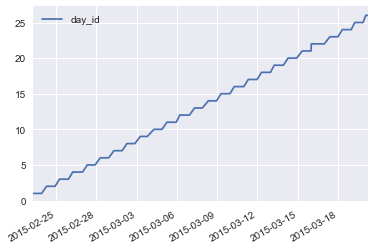

In [149]:
df1=df[df['user']=='u1']
df1.plot(df1.index,'day_id')
plt.show()

With data and our as an index we can plot graphics using this time reference for each sample.